In [8]:
import pandas as pd

df = pd.read_csv('owid-covid-data.csv')

print("Shape of dataset:", df.shape)

Shape of dataset: (350085, 67)


In [9]:
print("Columns:")
print(df.columns.tolist())

Columns:
['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred'

In [10]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [11]:
# Checking for missing values
missing_values = df.isnull().sum().sort_values(ascending=False)
print("Missing values (top 10):")
print(missing_values.head(10))

Missing values (top 10):
weekly_icu_admissions                      339880
weekly_icu_admissions_per_million          339880
excess_mortality_cumulative_per_million    337901
excess_mortality                           337901
excess_mortality_cumulative                337901
excess_mortality_cumulative_absolute       337901
weekly_hosp_admissions                     326832
weekly_hosp_admissions_per_million         326832
icu_patients_per_million                   312470
icu_patients                               312470
dtype: int64


In [12]:
# defining countries of interest: Kenya, Nigeria and South Africa
countries = ['Kenya', 'Nigeria', 'South Africa']

#Filtering the dataframe to only 3 countries(Kenya, Nigeria and South Africa)
df = df[df['location'].isin(countries)]

In [13]:
# Dropping rows with missing critical values
df = df.dropna(subset=['total_cases', 'total_deaths'])

In [15]:
# Filling missing values with 0
df.fillna(0, inplace=True)

In [16]:
# Convert date to datetime format
df['date'] = pd.to_datetime(df['date'])

In [18]:
# Checking data after cleaning
print(df.isnull().sum().sort_values(ascending=False).head(10))
df.info()


iso_code                               0
aged_65_older                          0
people_fully_vaccinated                0
total_boosters                         0
new_vaccinations                       0
new_vaccinations_smoothed              0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
total_boosters_per_hundred             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 3906 entries, 157871 to 290726
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   iso_code                                    3906 non-null   object        
 1   continent                                   3906 non-null   object        
 2   location                                    3906 non-null   object        
 3   date                                        3906 non-null   dat

/tmp/ipykernel_176/2708895129.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


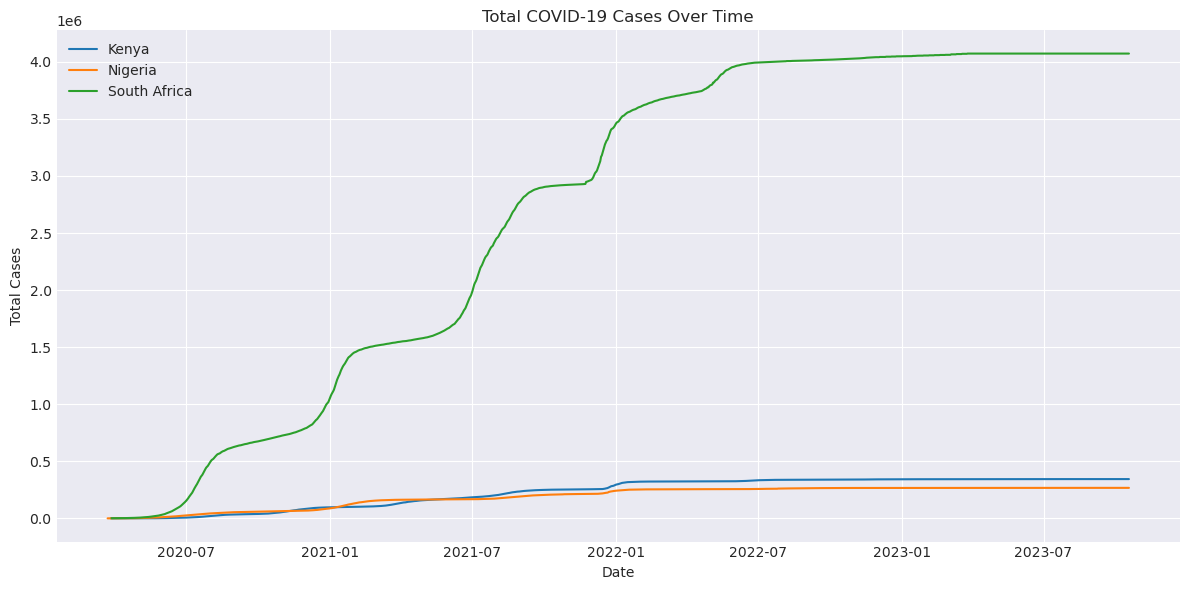

In [19]:
# Exploratory Data Analysis
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')

#1. Plot of Total Covid-19 cases over time
plt.figure(figsize=(12, 6))

for country in countries:
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['total_cases'], label=country)

plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.tight_layout()
plt.show()


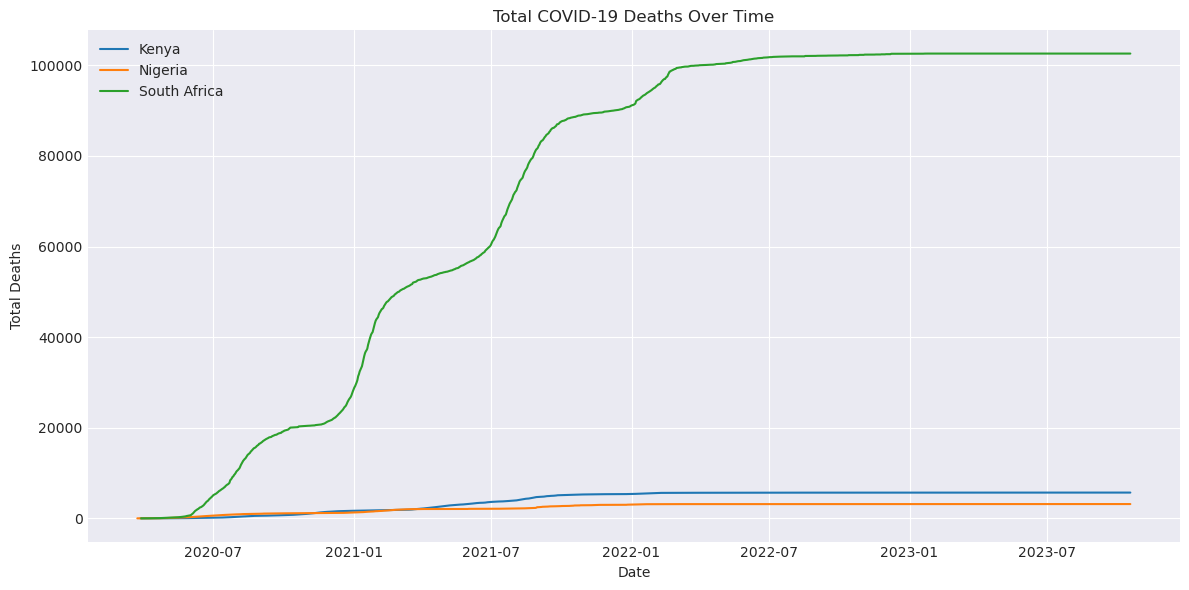

In [20]:
# Plot of Total deaths over time
plt.figure(figsize=(12, 6))

for country in countries:
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['total_deaths'], label=country)

plt.title("Total COVID-19 Deaths Over Time")
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.legend()
plt.tight_layout()
plt.show()


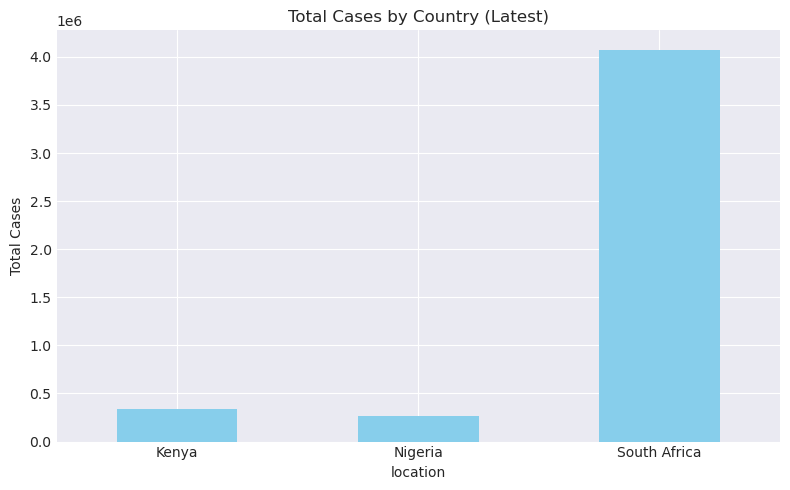

In [21]:
# Bar Chart of latest cases per country
latest = df[df['date'] == df['date'].max()]
latest_cases = latest.groupby('location')['total_cases'].max()

latest_cases.plot(kind='bar', color='skyblue', figsize=(8, 5))
plt.title("Total Cases by Country (Latest)")
plt.ylabel("Total Cases")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


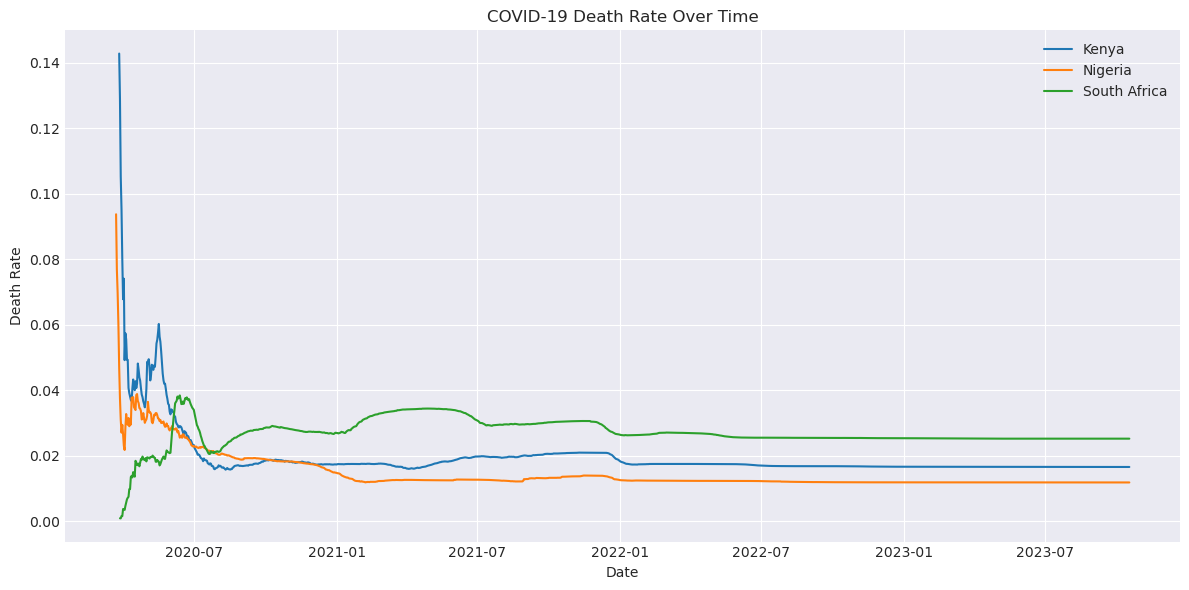

In [22]:
# Calculation and plotting of death rate over time
df['death_rate'] = df['total_deaths'] / df['total_cases']

plt.figure(figsize=(12, 6))
for country in countries:
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['death_rate'], label=country)

plt.title("COVID-19 Death Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Death Rate")
plt.legend()
plt.tight_layout()
plt.show()


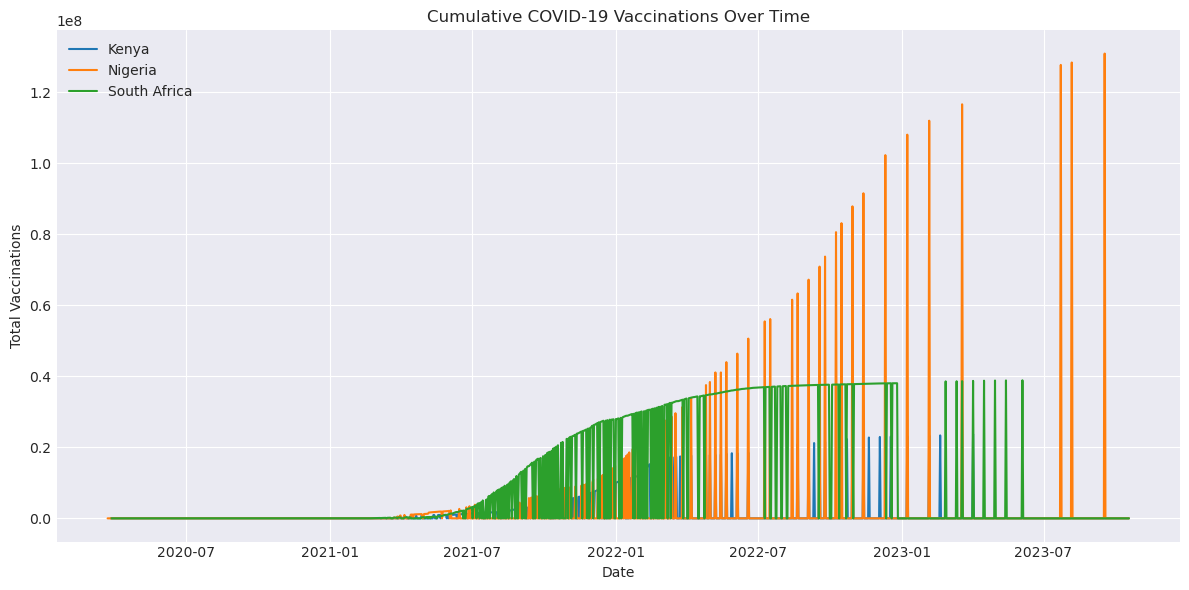

In [23]:
# Plot of cumulative vaccinations over time
plt.figure(figsize=(12, 6))

for country in countries:
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['total_vaccinations'], label=country)

plt.title("Cumulative COVID-19 Vaccinations Over Time")
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.legend()
plt.tight_layout()
plt.show()


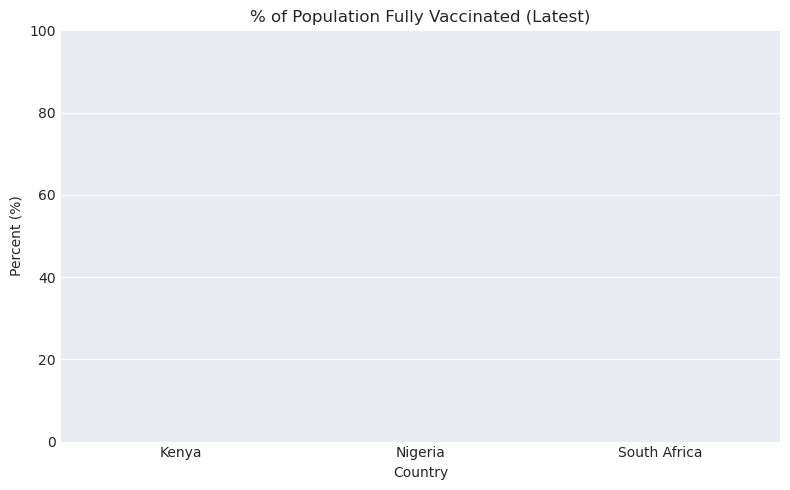

In [25]:
# Bar Chart of percentage population fully vaccinated
latest = df[df['date'] == df['date'].max()].copy()
latest['percent_fully_vaccinated'] = (latest['people_fully_vaccinated'] / latest['population']) * 100
# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='location', y='percent_fully_vaccinated', data=latest, palette='viridis')
plt.title("% of Population Fully Vaccinated (Latest)")
plt.ylabel("Percent (%)")
plt.xlabel("Country")
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


In [ ]:
## Key Insights

- **South Africa** had the highest number of total cases and deaths, but also led in vaccination coverage.
- **Kenya** showed multiple case spikes but maintained a relatively low death rate.
- **Nigeria** had the flattest curve in total cases and vaccinations, possibly due to underreporting or logistical challenges.
- Death rates across the three countries decreased significantly following vaccine rollouts.
